# Propriétés d'une population fictive: analyse univariée quantitative (ages)

Version du 7 mars 2024.

130 / 900 individus, cinq caractères: age, personnes dans le même foyer, fréquence de lecture du journal, orientation politique, genre, revenu mensuel




## Importer les librairies nécessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

## Références bibliographiques

Référence:

* [Statistique descriptive unidimensionnelle](http://wikistat.fr/pdf/st-l-des-uni.pdf) (Site Wikistat)


Compléments:

* Hamon : Hamon Philippe, Hamon Agnès, et Jégou Nicolas, _Statistique descriptive. Cours et exercices corrigés_, Rennes, PUR, 2008.
* Saly : Saly Pierre, _Méthodes statistiques descriptives pour les historiens_, Paris, A. Colin, 1991.
* [Statology - Tutorials](https://www.statology.org/tutorials/)



## Explorer les observations

* Regrouper et inspecter : la distribution
* Afficher et analyser : les graphiques

In [2]:
### Lire le fichier corrigé manuellement – ne pas effacer ce fichier !


# Alternative: 'data/observations_mod.csv'
path = 'data/observations_900.csv'

observations = pd.read_csv(path)
observations.set_index('id', inplace=True)
observations.head()

,age,gender,revenu_mensuel,lecture_journal,parti
id,,,,,
1,87,F,7410,trois-quatre fois par semaine,populiste
2,31,H,4466,de temps en temps,gauche
3,79,F,5515,trois-quatre fois par semaine,populiste
4,26,H,1876,le week-end,écologiste
5,75,F,3296,trois-quatre fois par semaine,gauche


In [3]:
## Nombre de lignes et de colonnes du tableau
observations.shape

(900, 5)

In [4]:
### Nombre de lignes du tableau
obs = observations
#obs = observations # 900
len(obs)

900

## Exploration des revenus

Variable quantitative continue



In [63]:
revenu = obs['revenu_mensuel']
revenu.head()

id
1    7410
2    4466
3    5515
4    1876
5    3296
Name: revenu_mensuel, dtype: int64

In [64]:
s_revenu = revenu.sort_values()
s_revenu.head()

id
623    1506
287    1509
705    1515
619    1519
156    1539
Name: revenu_mensuel, dtype: int64

In [66]:
### Centralité et dispersion
revenu.describe().round(0)

count       900.0
mean       6956.0
std       10445.0
min        1506.0
25%        3952.0
50%        5682.0
75%        8188.0
max      265334.0
Name: revenu_mensuel, dtype: float64

<Axes: >

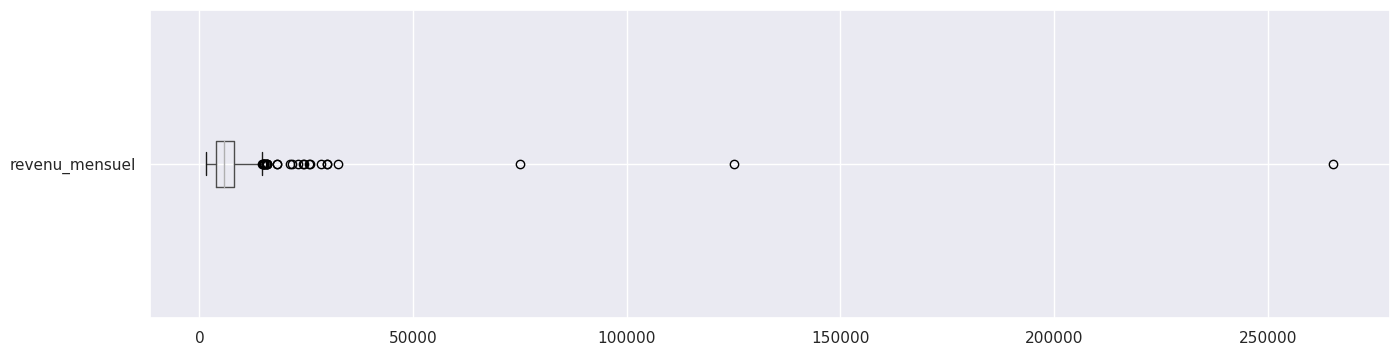

In [67]:
### Diagramme-boîte ou boîte-à-moustache pour représenter la dispersion
# Ligne centrale = la médiane. Le box est entre 1er et 3e quartile
# La moitié de la population se situe entre 31 et 68 ans
#  Noter qu'on utilise le DataFrame car cet objet dispose d'une méthode boxplot
# ce qui n'est pas le cas d'une série (pd.Series)
obs.boxplot(column=['revenu_mensuel'], vert=False, figsize=(16,4))

<Axes: >

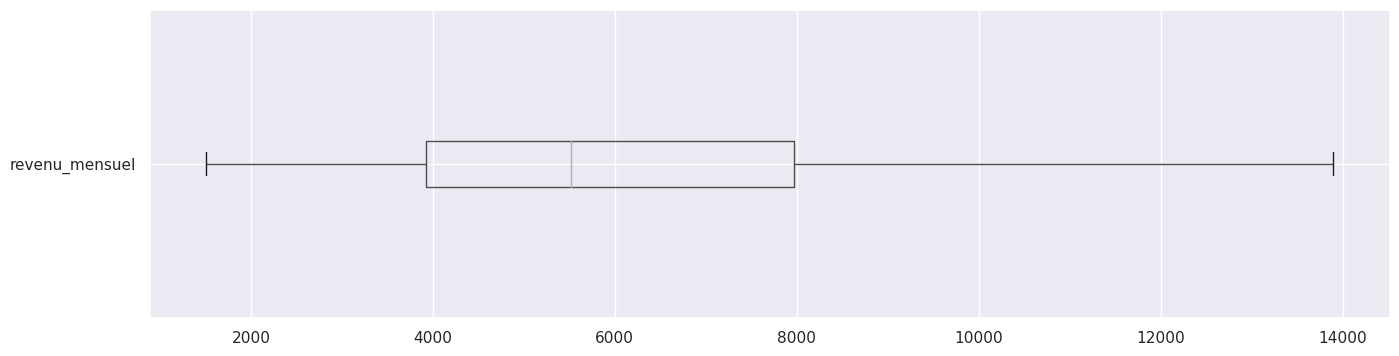

In [73]:
###Eliminer les valeurs extrèmes gâce à un filtre
obs[obs['revenu_mensuel'] < 14000].boxplot(column=['revenu_mensuel'], vert=False, figsize=(16,4))

(1506.0, 13895.0)

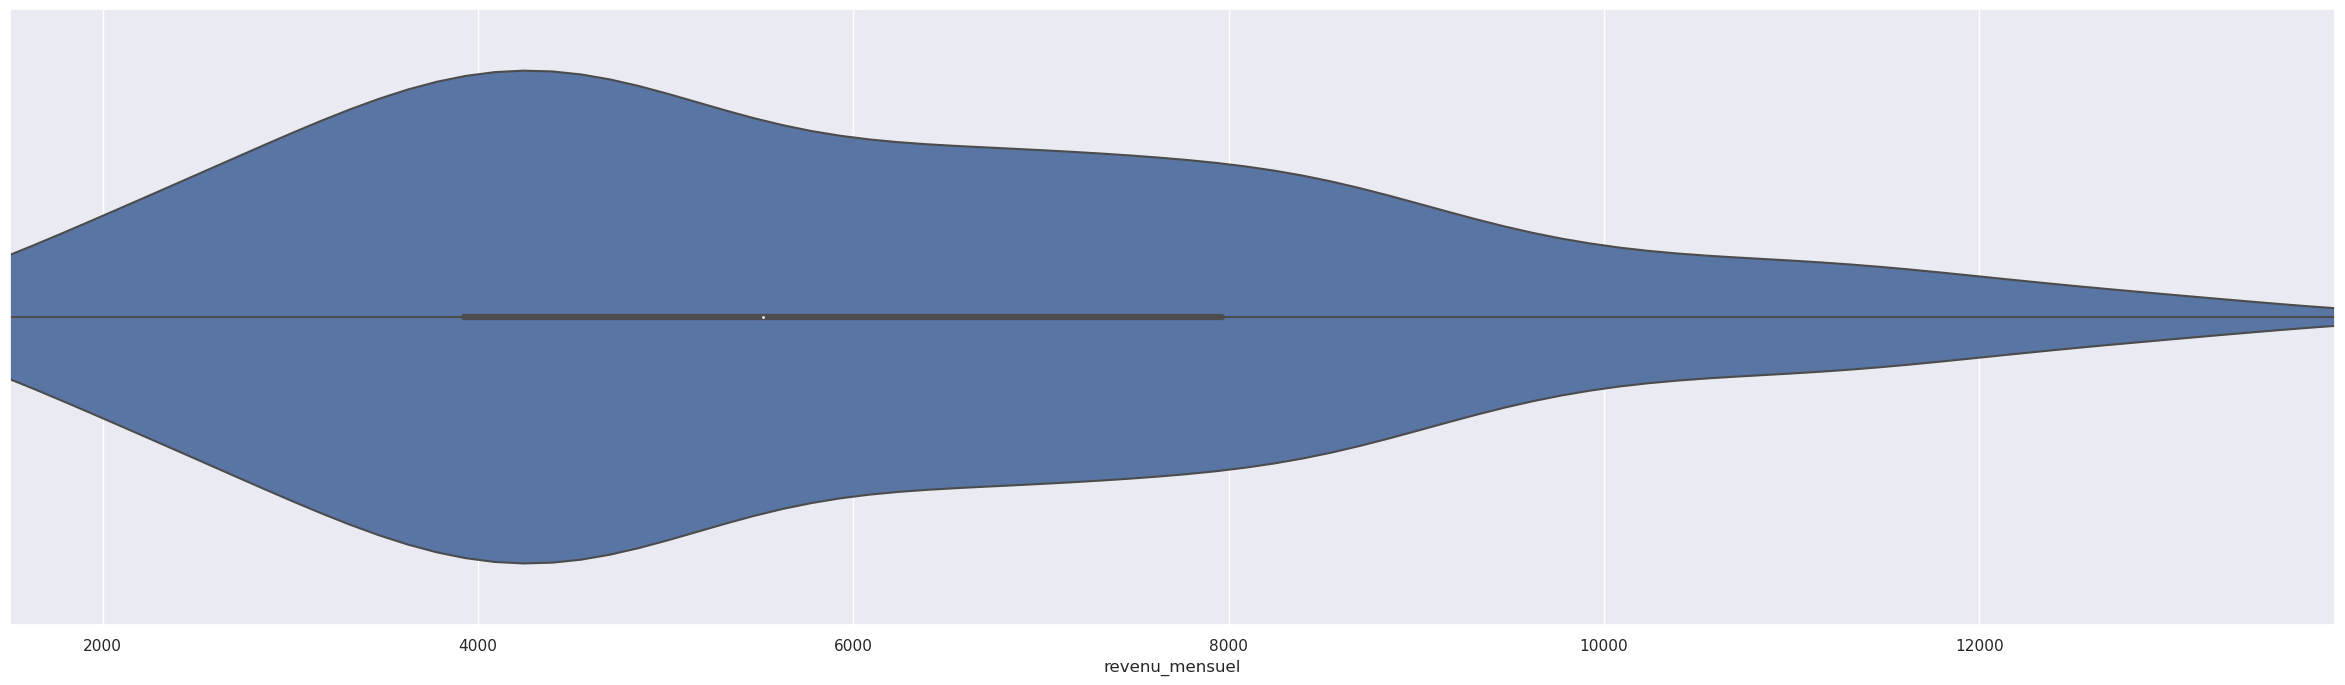

In [74]:
### Le violin plot montre bien où se situent les revenus les plus fréquents

sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(30, 8)})

a = obs[obs['revenu_mensuel'] < 14000]["revenu_mensuel"]

ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont postulées
ax.set_xlim(left=min(a), right=max(a))



In [75]:
### Créer quatre classes de revenus en utilisant les quartiles
# Chaque classe contient ainsi un quart de la population
df_s_revenu = pd.DataFrame(s_revenu)
df_s_revenu['qcut'] = pd.qcut(df_s_revenu['revenu_mensuel'], 4)
df_s_revenu

,revenu_mensuel,qcut
id,,
623,1506,"(1505.999, 3952.25]"
287,1509,"(1505.999, 3952.25]"
705,1515,"(1505.999, 3952.25]"
619,1519,"(1505.999, 3952.25]"
156,1539,"(1505.999, 3952.25]"
...,...,...
315,29828,"(8188.5, 265334.0]"
378,32391,"(8188.5, 265334.0]"
206,75040,"(8188.5, 265334.0]"


In [76]:
### Regrouper par classe et ajouter le nombre d'individus
gbdf_size_revenu = df_s_revenu.groupby(by='qcut').size()
gbdf_size_revenu = gbdf_size_revenu.reset_index()
gbdf_size_revenu.columns = ['qcut', 'effectif']
gbdf_size_revenu

,qcut,effectif
0,"(1505.999, 3952.25]",225
1,"(3952.25, 5682.5]",225
2,"(5682.5, 8188.5]",225
3,"(8188.5, 265334.0]",225


In [77]:
### Ajouter la fréquence
gbdf_size_revenu['frequence_eff'] = (gbdf_size_revenu['effectif'] \
                / gbdf_size_revenu['effectif'].sum()).round(6)
gbdf_size_revenu

,qcut,effectif,frequence_eff
0,"(1505.999, 3952.25]",225,0.25
1,"(3952.25, 5682.5]",225,0.25
2,"(5682.5, 8188.5]",225,0.25
3,"(8188.5, 265334.0]",225,0.25


In [78]:
### Regrouper par classe et ajouter la somme des salaires par classe
gbdf_sum_revenu = df_s_revenu.groupby(by='qcut').sum()
gbdf_sum_revenu = gbdf_sum_revenu.reset_index()
gbdf_sum_revenu.columns = ['qcut', 'somme']
gbdf_sum_revenu

,qcut,somme
0,"(1505.999, 3952.25]",662450
1,"(3952.25, 5682.5]",1066050
2,"(5682.5, 8188.5]",1560391
3,"(8188.5, 265334.0]",2971714


In [79]:
### Ajouter une colonne avec la fréquence
gbdf_sum_revenu['frequence_somme'] = (gbdf_sum_revenu['somme'] \
                / gbdf_sum_revenu['somme'].sum()).round(6)
gbdf_sum_revenu

,qcut,somme,frequence_somme
0,"(1505.999, 3952.25]",662450,0.105812
1,"(3952.25, 5682.5]",1066050,0.170279
2,"(5682.5, 8188.5]",1560391,0.249240
3,"(8188.5, 265334.0]",2971714,0.474669


In [80]:
### Ajouter la fréquence cumulée
gbdf_sum_revenu['frequence_cumulee_somme'] = gbdf_sum_revenu['frequence_somme'].cumsum()
gbdf_sum_revenu

,qcut,somme,frequence_somme,frequence_cumulee_somme
0,"(1505.999, 3952.25]",662450,0.105812,0.105812
1,"(3952.25, 5682.5]",1066050,0.170279,0.276091
2,"(5682.5, 8188.5]",1560391,0.249240,0.525331
3,"(8188.5, 265334.0]",2971714,0.474669,1.000000


In [81]:
def calculer_densite_width(ligne, colonne_frequence):
    x = ligne['qcut']
    ampl = int(x.right) - int(x.left)
    right = int(x.right)
    left = int(x.left)
    d = round(ligne[colonne_frequence]/ampl,8)
    return([d, left, right, ampl])

In [82]:
### Fusionner les tableaux
gbdf_merged = pd.merge(gbdf_size_revenu, gbdf_sum_revenu, on='qcut')
gbdf_merged

,qcut,effectif,frequence_eff,somme,frequence_somme,frequence_cumulee_somme
0,"(1505.999, 3952.25]",225,0.25,662450,0.105812,0.105812
1,"(3952.25, 5682.5]",225,0.25,1066050,0.170279,0.276091
2,"(5682.5, 8188.5]",225,0.25,1560391,0.249240,0.525331
3,"(8188.5, 265334.0]",225,0.25,2971714,0.474669,1.000000


In [83]:
gbdf_merged['densite_eff'] = gbdf_merged.apply(lambda x: calculer_densite_width(x, 'frequence_eff'), axis=1)
gbdf_merged

,qcut,effectif,frequence_eff,somme,frequence_somme,frequence_cumulee_somme,densite_eff
0,"(1505.999, 3952.25]",225,0.25,662450,0.105812,0.105812,"[0.00010217, 1505, 3952, 2447]"
1,"(3952.25, 5682.5]",225,0.25,1066050,0.170279,0.276091,"[0.00014451, 3952, 5682, 1730]"
2,"(5682.5, 8188.5]",225,0.25,1560391,0.249240,0.525331,"[9.976e-05, 5682, 8188, 2506]"
3,"(8188.5, 265334.0]",225,0.25,2971714,0.474669,1.000000,"[9.7e-07, 8188, 265334, 257146]"


In [84]:
gbdf_merged.apply(lambda x: x['densite_eff'].append(x['frequence_cumulee_somme']), axis=1)
gbdf_merged

,qcut,effectif,frequence_eff,somme,frequence_somme,frequence_cumulee_somme,densite_eff
0,"(1505.999, 3952.25]",225,0.25,662450,0.105812,0.105812,"[0.00010217, 1505, 3952, 2447, 0.105812]"
1,"(3952.25, 5682.5]",225,0.25,1066050,0.170279,0.276091,"[0.00014451, 3952, 5682, 1730, 0.2760910000000..."
2,"(5682.5, 8188.5]",225,0.25,1560391,0.249240,0.525331,"[9.976e-05, 5682, 8188, 2506, 0.525331]"
3,"(8188.5, 265334.0]",225,0.25,2971714,0.474669,1.000000,"[9.7e-07, 8188, 265334, 257146, 1.0]"


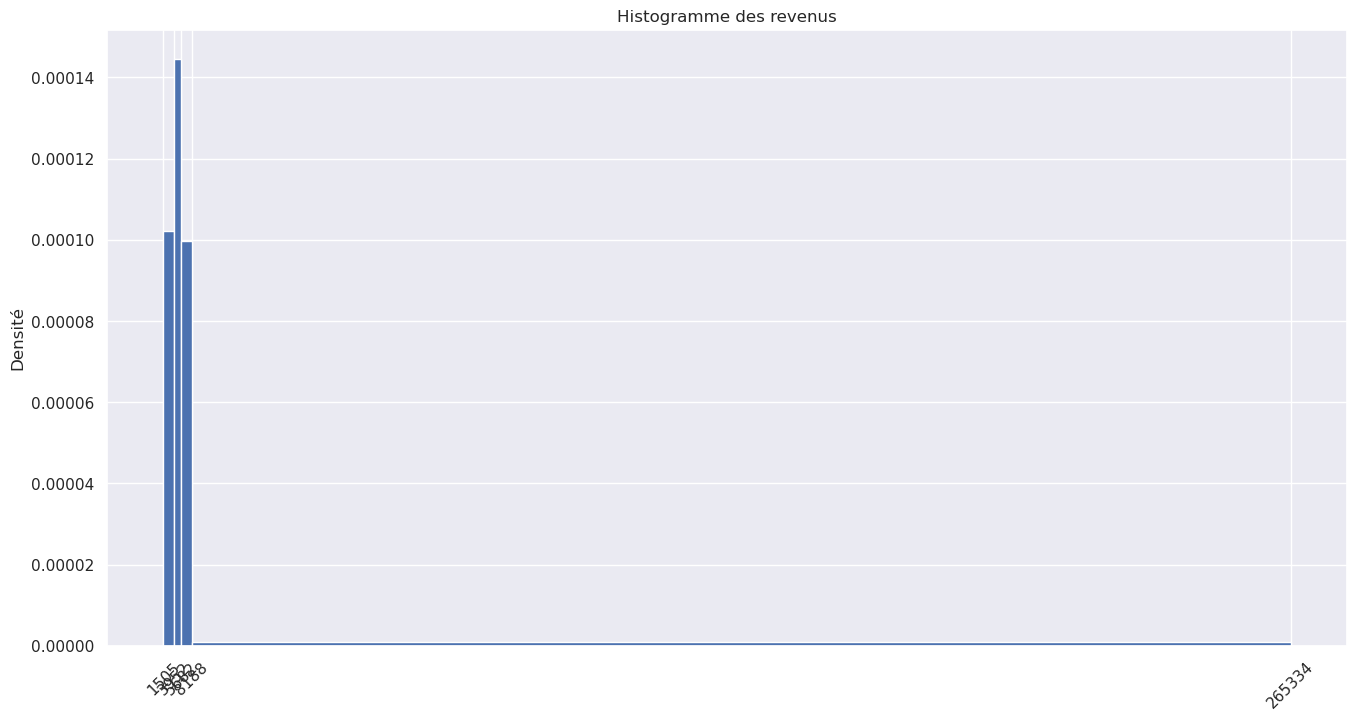

In [85]:
### Histogramme
# La hauteur des barres, en ordonnées, représente la densité non l'effectif, 
# l'effectif est représenté par l'aire
##  Noter le nombre élevé de revenus autour de 8000 CHF, 
## en revanche peu d'individus dans la classe avec les plus haut revenus

fig,ax = plt.subplots(1,1)

objects = [l[1] for l in gbdf_merged['densite_eff']]
eff = [l[0] for l in gbdf_merged['densite_eff']]
width = [l[3]  for l in gbdf_merged['densite_eff']]


fig = plt.bar(objects, eff, width = width, align="edge")
ax.set_xticks(objects + [[l[2] for l in gbdf_merged['densite_eff']][-1]])
plt.ylabel('Densité')
plt.title('Histogramme des revenus')
plt.gcf().set_size_inches(16, 8)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
# plt.savefig('exported_pictures/effectifs_annees_reference_par_periode.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()

[897.   1.   1.   0.   1.]


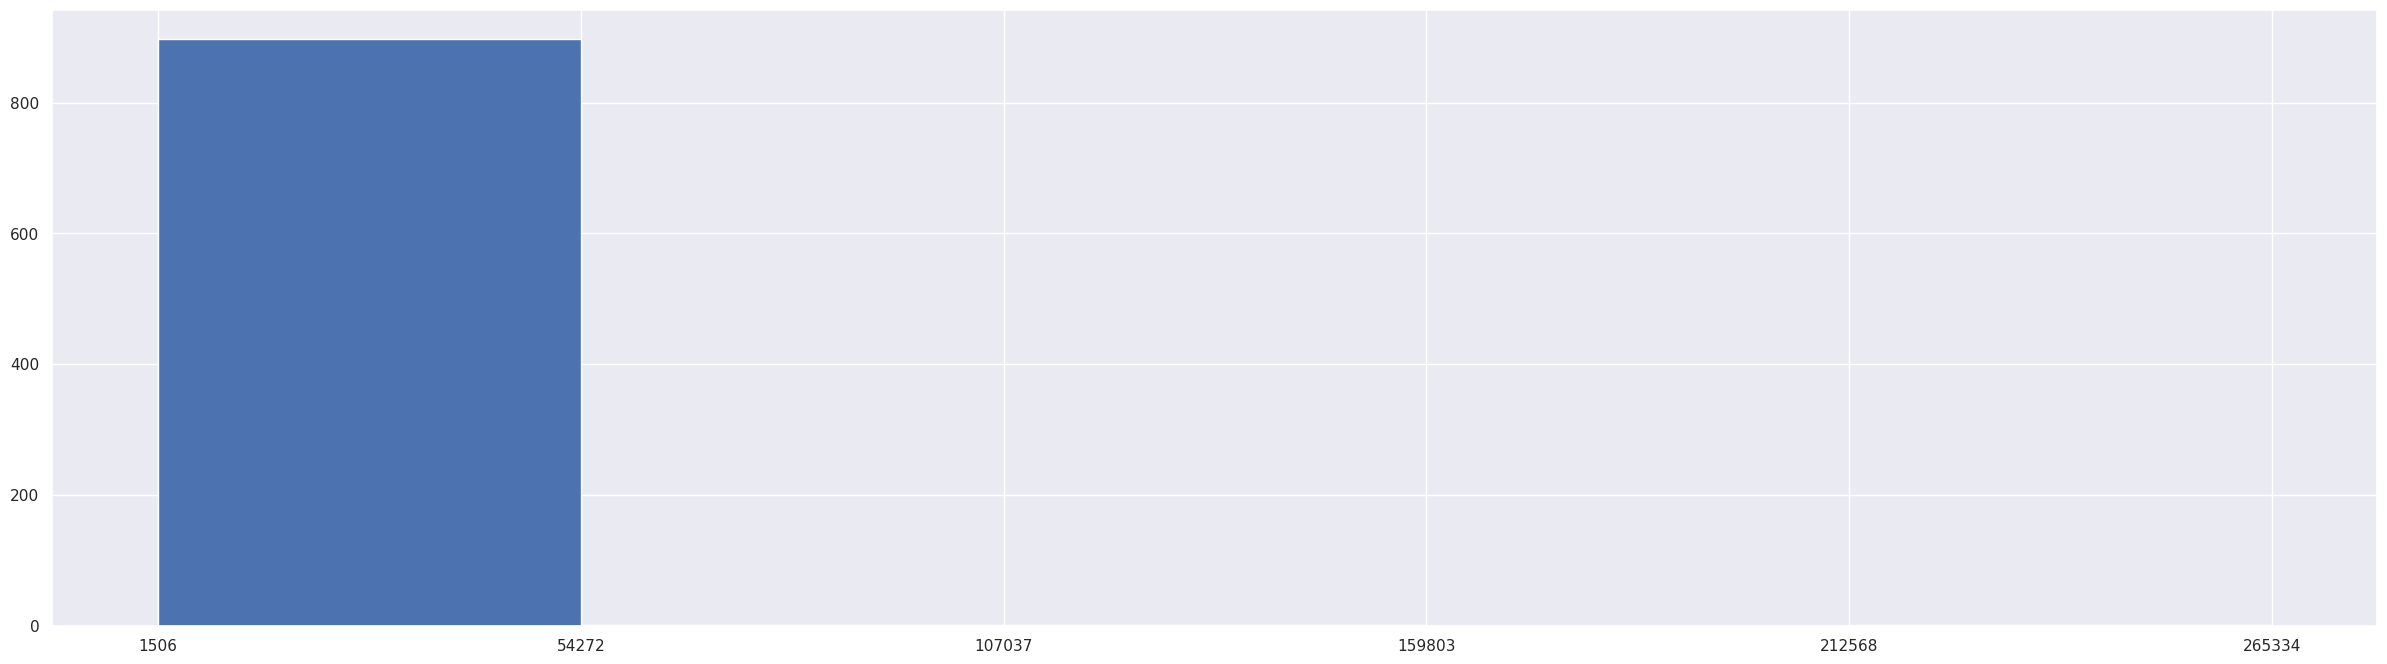

In [86]:
### Le graphique par défaut de Matplotlib, 
#  ne met pas en évidence la spécificité de la distribution,
#  i.e. le nombre élevé de revenus autour de 8000 CHF
# Ceci dépend d'un (et illustre un) découpage des classes non pertinent
n, bins, patches = plt.hist(s_revenu, bins=5, density=False)
print(n)
plt.xticks(bins)
plt.show()

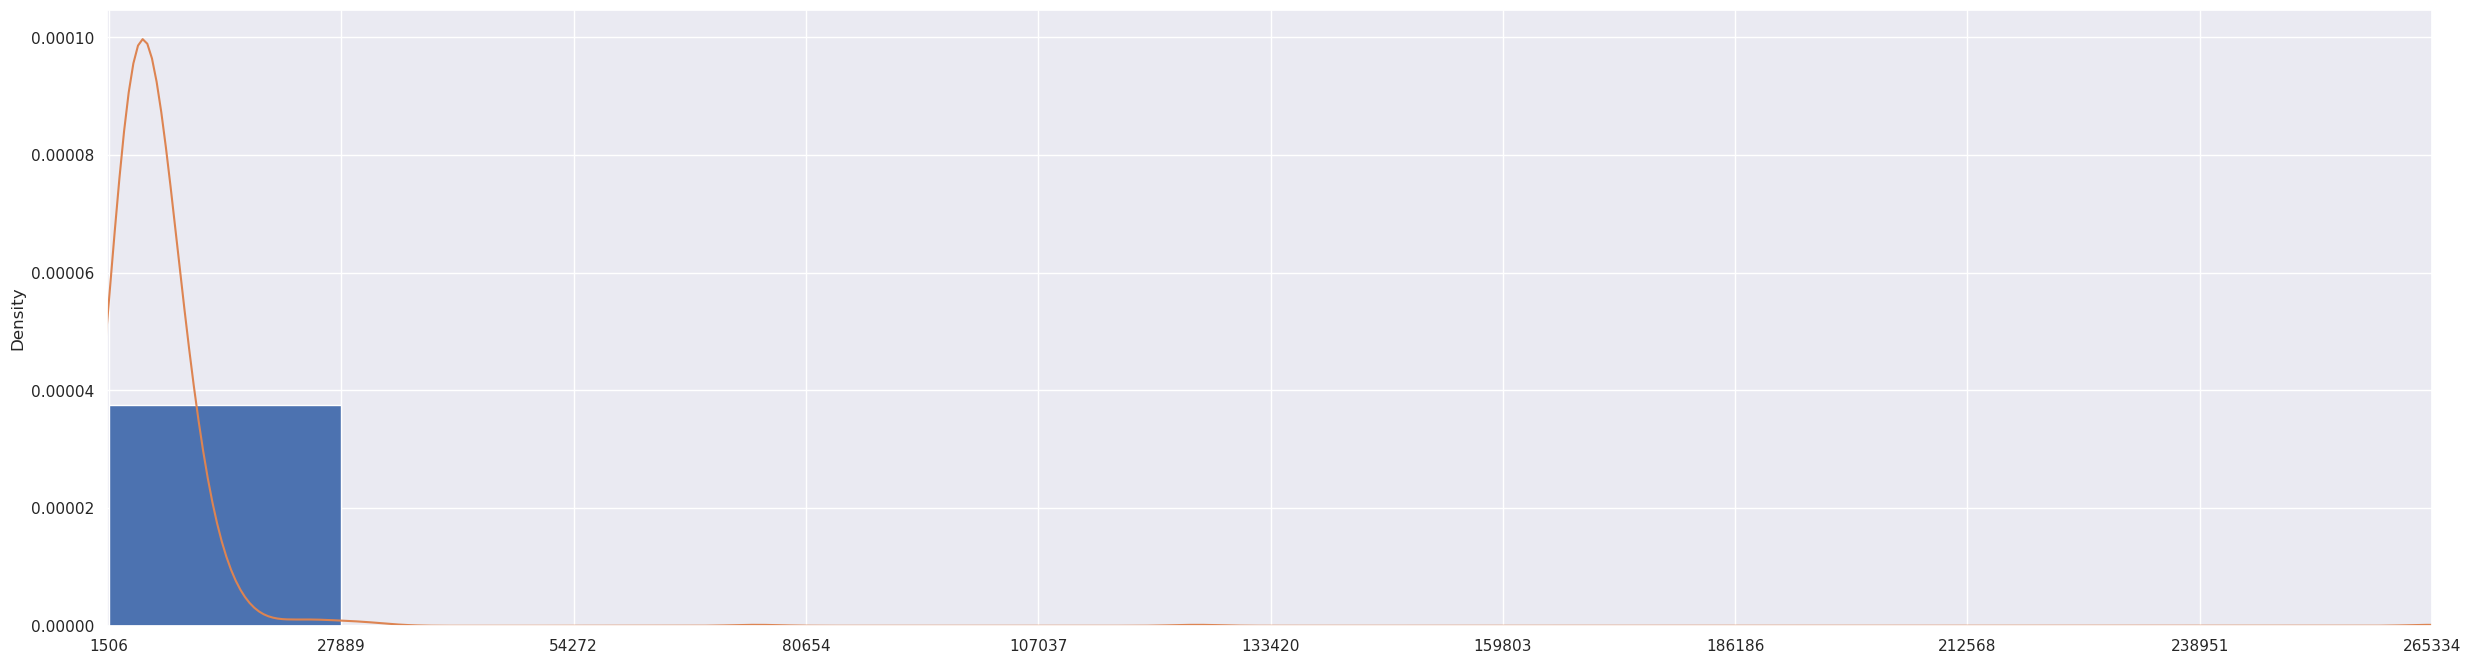

In [87]:
### Le graphique par défaut de Matplotlib, 
#  ne met pas en évidence la spécificité de la distribution,
#  i.e. le nombre élevé de revenus autour de 8000 CHF
# Ceci dépend d'un (et illustre un) découpage des classes non pertinent
n, bins, patches = plt.hist(s_revenu, density=True)
ax = s_revenu.plot.kde()

ax.set_xlim(1300, 46000)
plt.xticks(bins)
plt.show()

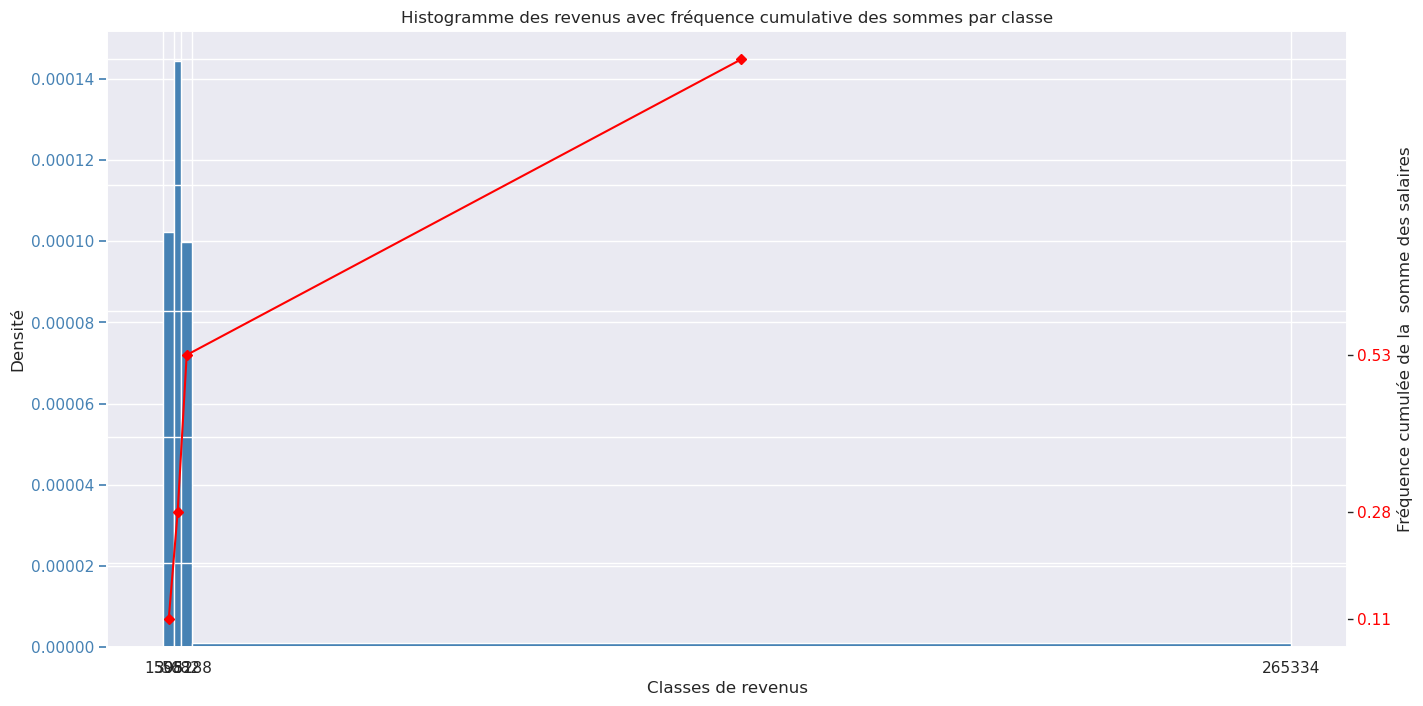

In [88]:
### Ajouter les fréquences cumulées à l'histogramme de la densité des effectifs
fig, ax = plt.subplots(1)


objects = [l[1] for l in gbdf_merged['densite_eff']]
eff = [l[0] for l in gbdf_merged['densite_eff']]
width = [l[3]  for l in gbdf_merged['densite_eff']]
valeur = [round(l[4],2) for l in gbdf_merged['densite_eff']]
ticks = [l[1] + (l[3]/2) for l in gbdf_merged['densite_eff']]



#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 5


ax.bar(objects, eff, width = width, align="edge", color=color1)
ax1 = ax.twinx()
ax1.plot(ticks,valeur, color = color2,  marker="D", ms=line_size)


ax.set_xticks(objects + [[l[2] for l in gbdf_merged['densite_eff']][-1]])

plt.title('Histogramme des revenus avec fréquence cumulative des sommes par classe')
plt.gcf().set_size_inches(16, 8)

ax.set_xlabel('Classes de revenus')
ax.set_ylabel('Densité')

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax1.tick_params(axis='y', colors='white')
ax1.set_ylabel('Fréquence cumulée de la  somme des salaires')

plt.yticks(ticks=valeur, minor=True, labels= valeur, color=color2)
plt.xticks(rotation=45)


plt.show()

### Distribution de probabilité

<class 'pandas.core.frame.DataFrame'>


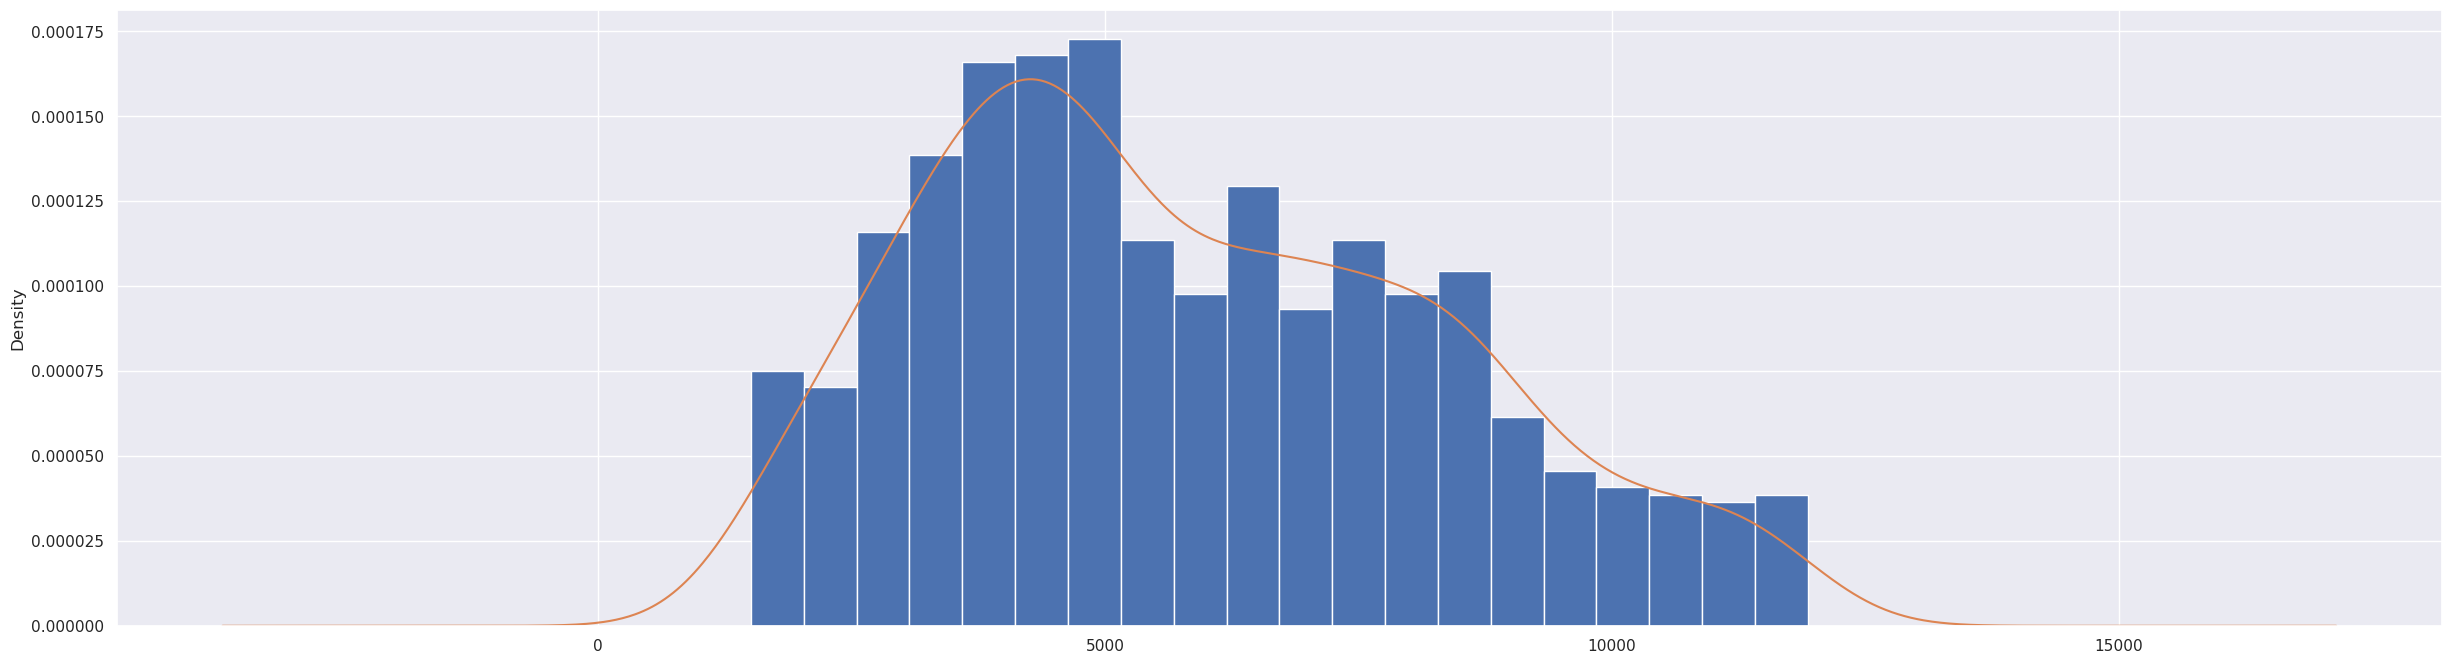

In [89]:
a = pd.DataFrame(obs[obs['revenu_mensuel'] < 12000]["revenu_mensuel"])
a.columns=['revenu']
print(type(a))
a['revenu'].plot(kind='hist', density=True, bins=20)
a['revenu'].plot.kde()
plt.show()

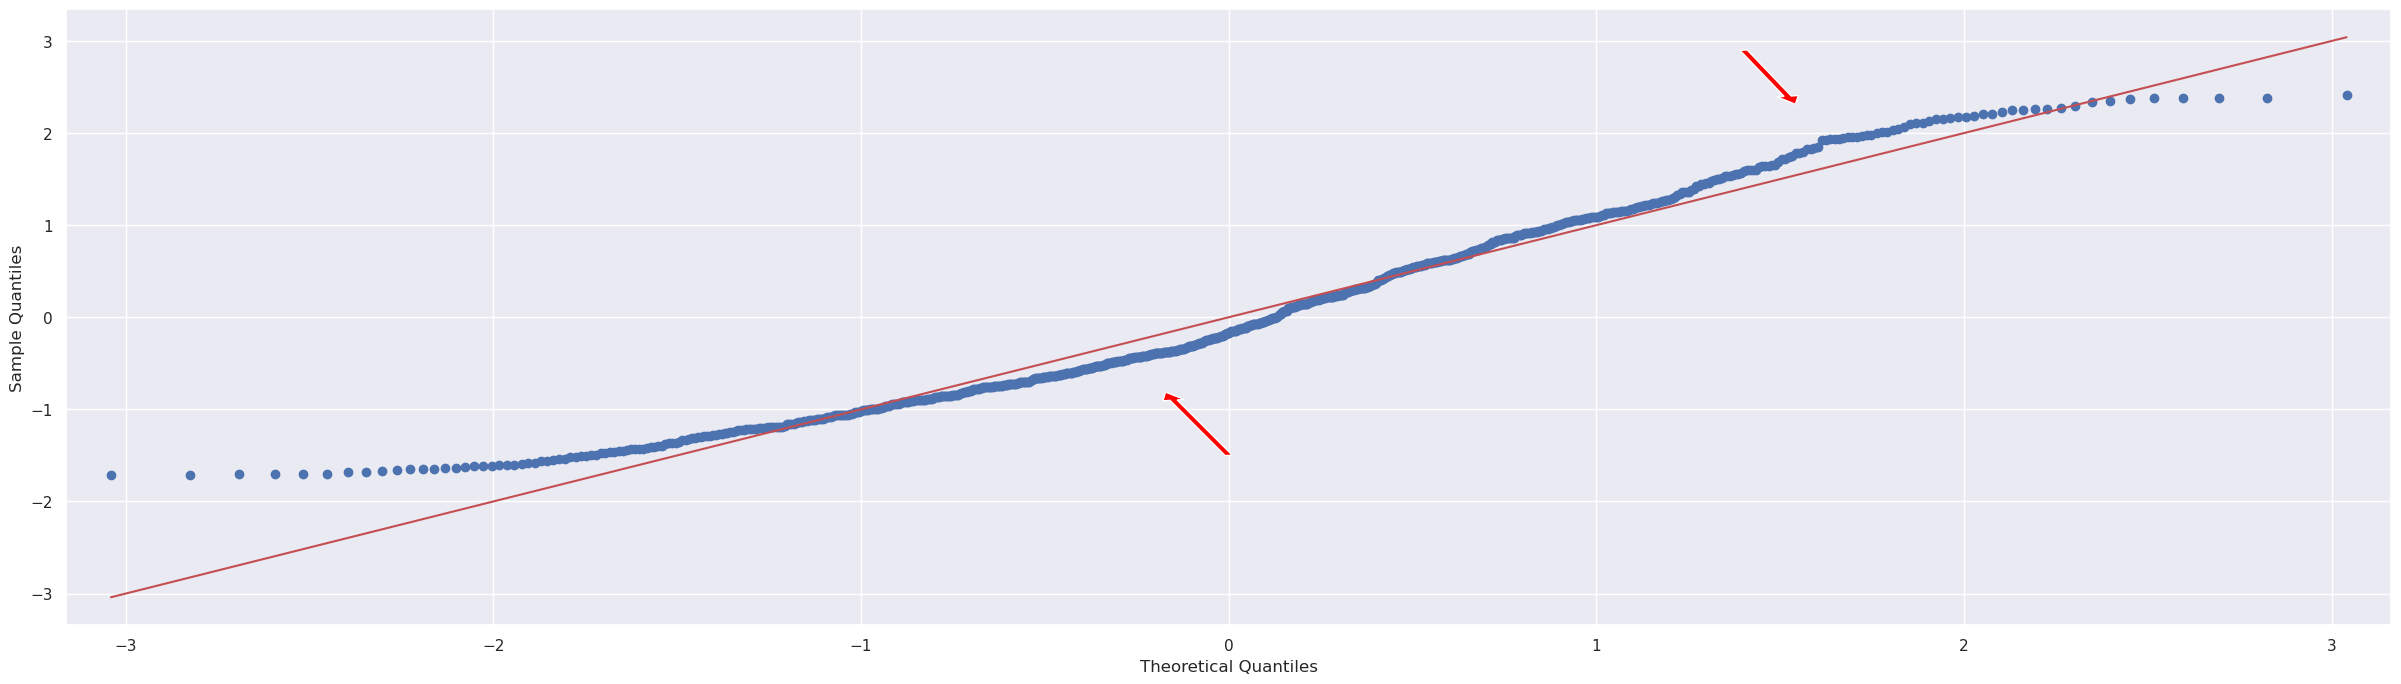

In [97]:
### QQ Plot des données concernant les revenus de l'échantillon
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html#statsmodels.graphics.gofplots.qqplot
# fit = True normalise automatiquement les données
sm.qqplot(a['revenu'], line='s', fit=True)
plt.arrow(x=0, y=-1.5, dx=-0.15, dy=+0.6, width=.02, facecolor='red') 
plt.arrow(x=1.4, y=2.9, dx=0.12, dy=-0.5, width=.02, facecolor='red') 
plt.show()

### Commentaire

Noter que la distribution n'est pas normale mais multimodale, avec deux ou trois sommets, et qu'il y a des valeurs extrèmes. 
Cf. les références proposées ci-dessus au sujet de la distribution de l'âge.

On ne peut donc pas effectuer des tests paramétriques utilisant la distribution normale et que la correlation de Pearsons (cf. analyse quantitative bivariée) n'est pas appliquable à cette variable.

Comme la distribution est multimodale, l'application de transformations simples comme le logarithme naturel ne permet pas de se rapprocher de la distribution normale, comme ce serait le cas si la distribution était exponentielle.

On pourrait toutefois préciser l'analyse en découpant ultérieurement la population et en mettant en évidence les deux-trois parties à distribution normale, tout en vérifiant que ça a du sens par rapport au contexte et aux autres variables. On pourrait par exemple découper par tranches d'age.

Voir les explications de ce carnet: https://www.kaggle.com/code/iamleonie/handling-multimodal-distributions-fe-techniques

In [98]:
### Test de Shapiro-Wilk: hypothèse H0 = distribution normale
sa = stats.shapiro(a['revenu'])
print(sa)
# Commentaire: la valeur de probabilité est 0.000490 et donc laragement inférieure à 0.05:
# on doit donc rejeteur l'H0 et considérer que la distribution ne suit pas la loi normale avec 95% de probabilité

ShapiroResult(statistic=0.9670093059539795, pvalue=6.976047886055048e-13)


In [99]:
print(f"{sa.pvalue:.5f}")

0.00000


## Graphique de Pareto

* [Principe de Pareto](https://fr.wikipedia.org/wiki/Principe_de_Pareto) (Wikipedia)
* [Loi de Pareto](https://fr.wikipedia.org/wiki/Loi_de_Pareto) (Wikipedia)


In [100]:
### Ajouter une colonne avec codage des revenu 
# en relation avec des effectifs identiques des classes

c_obs['revenu_mensuel_cut'] = pd.qcut(c_obs['revenu_mensuel'], 10)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a enlevé une unité afin d'avoir des valeurs incluses
c_obs['revenu_mensuel_cut'] = c_obs['revenu_mensuel_cut'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
c_obs.head(3)

,age,gender,revenu_mensuel,lecture_journal,parti,generation_heur,generation_cut,generation_qcut,revenu_mensuel_cut,age_norm
id,,,,,,,,,,
1,87,F,7410,trois-quatre fois par semaine,populiste,66-90,75-89,76-89,6626-7651,1.540712
2,31,H,4466,de temps en temps,gauche,26-35,18-31,17-30,4234-4862,-1.078239
3,79,F,5515,trois-quatre fois par semaine,populiste,66-90,75-89,76-89,4863-5681,1.166576


In [101]:
### Regrouper et compter par classe de salaire avec la fonction Pandas 'groupby' 
df_revenu = pd.DataFrame(c_obs.groupby('revenu_mensuel_cut').size())
df_revenu.columns = ['effectif']
df_revenu

,effectif
revenu_mensuel_cut,
1505-2807,90
2808-3646,90
3647-4233,90
4234-4862,91
4863-5681,89
5682-6625,90
6626-7651,90
7652-8713,90
8714-10827,90


In [102]:
### Calculer et ajouter la fréquence
#  en tant que proportion entre l'effectif de la valeur et l'effectif total

df_revenu['frequence'] = (df_revenu['effectif'] \
                                   / df_revenu['effectif'].sum()).round(2)
df_revenu

,effectif,frequence
revenu_mensuel_cut,,
1505-2807,90,0.1
2808-3646,90,0.1
3647-4233,90,0.1
4234-4862,91,0.1
4863-5681,89,0.1
5682-6625,90,0.1
6626-7651,90,0.1
7652-8713,90,0.1
8714-10827,90,0.1


In [103]:
### Ajouter la fréquence cumulée
df_revenu['frequence_cumulee'] = df_revenu['frequence'].cumsum()
df_revenu.head()

,effectif,frequence,frequence_cumulee
revenu_mensuel_cut,,,
1505-2807,90,0.1,0.1
2808-3646,90,0.1,0.2
3647-4233,90,0.1,0.3
4234-4862,91,0.1,0.4
4863-5681,89,0.1,0.5


In [104]:
### Regrouper et additionner les salaires par classe 
df_somme = pd.DataFrame(c_obs.groupby('revenu_mensuel_cut')['revenu_mensuel'].sum())
df_somme.columns = ['somme']
df_somme

,somme
revenu_mensuel_cut,
1505-2807,198353
2808-3646,292923
3647-4233,355460
4234-4862,415534
4863-5681,466230
5682-6625,557991
6626-7651,644489
7652-8713,738880
8714-10827,866009


In [105]:
### Calculer et ajouter la fréquence
#  en tant que proportion entre l'effectif de la valeur et l'effectif total

df_somme['frequence_somme'] = (df_somme['somme'] \
                                   / df_somme['somme'].sum()).round(2)
df_somme.head()

,somme,frequence_somme
revenu_mensuel_cut,,
1505-2807,198353,0.03
2808-3646,292923,0.05
3647-4233,355460,0.06
4234-4862,415534,0.07
4863-5681,466230,0.07


In [106]:
### Ajouter la fréquence cumulée
df_somme['frequence_somme_cumulee'] = df_somme['frequence_somme'].cumsum()
df_somme.head()

,somme,frequence_somme,frequence_somme_cumulee
revenu_mensuel_cut,,,
1505-2807,198353,0.03,0.03
2808-3646,292923,0.05,0.08
3647-4233,355460,0.06,0.14
4234-4862,415534,0.07,0.21
4863-5681,466230,0.07,0.28


In [107]:
df_merged = pd.merge(df_revenu, df_somme, left_index=True, right_index=True)
df_merged

,effectif,frequence,frequence_cumulee,somme,frequence_somme,frequence_somme_cumulee
revenu_mensuel_cut,,,,,,
1505-2807,90,0.1,0.1,198353,0.03,0.03
2808-3646,90,0.1,0.2,292923,0.05,0.08
3647-4233,90,0.1,0.3,355460,0.06,0.14
4234-4862,91,0.1,0.4,415534,0.07,0.21
4863-5681,89,0.1,0.5,466230,0.07,0.28
5682-6625,90,0.1,0.6,557991,0.09,0.37
6626-7651,90,0.1,0.7,644489,0.10,0.47
7652-8713,90,0.1,0.8,738880,0.12,0.59
8714-10827,90,0.1,0.9,866009,0.14,0.73


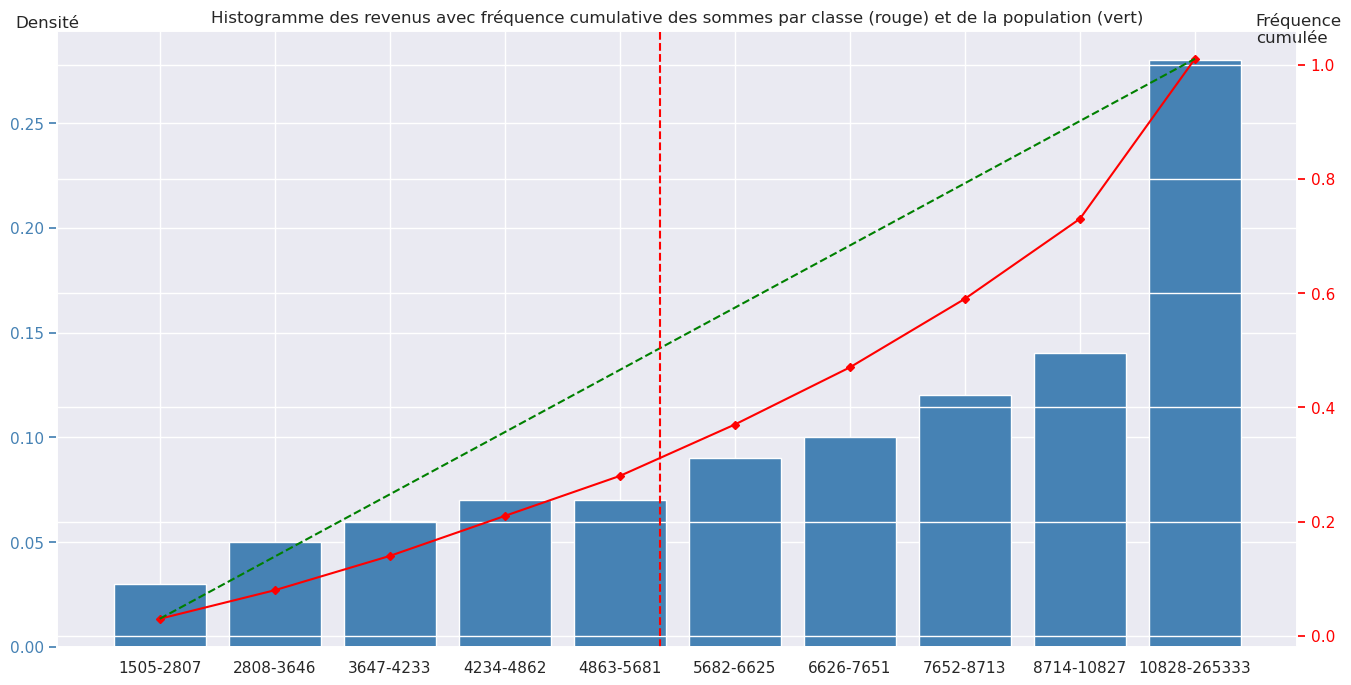

In [144]:
### Pareto distribution
# https://www.statology.org/pareto-chart-python/


df = df_merged 

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(df.index, df['frequence_somme'], color=color1)
ax.set_ylabel('Densité', rotation=0, labelpad=-50, y=1, ha='right') #, , , y=1, x=-3 , labelpad=10

plt.title('Histogramme des revenus avec fréquence cumulative des sommes par classe (rouge) et de la population (vert)')

plt.gcf().set_size_inches(16, 8)
#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df.index, df['frequence_somme_cumulee'], color=color2, marker="D", ms=line_size)
# ax2.yaxis.set_major_formatter(PercentFormatter())

ax3 = ax.twinx()
ax3.plot(df.index, df['frequence_cumulee'], color='green', linestyle='dashed')
ax3.set_ylabel('Fréquence\ncumulée', rotation=0, labelpad=-30, y=1.03, ha='left') #rotation=0, labelpad=-5,  , y=1, x=-3 , labelpad=10

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)
# cacher les valeurs de cette variable
ax3.set_yticks([])

plt.axvline(x=4.35, color='red', linestyle='--')

#display Pareto chart
plt.show()

#### Commentaire du graphique

On note que l'accroissement de la richesse ne suit pas celui de la population:
* à la médiane de la population (indiquée par la ligne vertical rouge qui indique les 50% de la fréquence cumulée) on n'a atteint qu'autour de 30% des salaires cumulés 
* les 20 % les plus riches de la population accumulent presque 60 % des revenus